In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from random import choices, seed

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from scipy.stats import zscore

from tqdm import tqdm_notebook

In [2]:
RANDOM_STATE = 42

## Препроцессинг и изучение данных

In [3]:
df = pd.read_csv("D:/Projects/University/ML/Task3/CC_GENERAL.csv").dropna()

Посмотрим на разброс значений и типы данных признаков датасета:

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Колонка CUST_ID - идентификатор покупателя, её будем использовать в качестве индекса:

In [6]:
df = df.set_index("CUST_ID")

In [7]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [8]:
df[
    [
        "CASH_ADVANCE_TRX",
        "PURCHASES_TRX",
        "TENURE"
    ]
]

,CASH_ADVANCE_TRX,PURCHASES_TRX,TENURE
CUST_ID,,,
C10001,0,2,12
C10002,4,0,12
C10003,0,12,12
C10005,0,1,12
C10006,0,8,12
...,...,...,...
C19184,0,1,6
C19186,0,6,6
C19188,0,5,6


Удалим выбросы - объекты, отклонение которых от среднего по какому-либо из признаков составляет больше $3 \sigma$:

In [9]:
df = df[(np.abs(zscore(df)) < 3).all(axis=1)]

Стандартизируем признаки, используя z-преобразование:

In [10]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)

In [11]:
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.824859,-0.471098,-0.648317,-0.546783,-0.457754,-0.548419,-0.825388,-0.674657,-0.714812,-0.699732,-0.589346,-0.675447,-1.022285,-0.783455,-0.573182,-0.536968,0.310949
C10002,1.237850,0.015621,-0.740038,-0.546783,-0.643143,4.594878,-1.245685,-0.674657,-0.926316,0.851936,0.395008,-0.805885,1.005652,1.922783,0.603055,0.226610,0.310949
C10003,0.776372,0.502340,0.003318,0.416138,-0.643143,-0.548419,1.276090,2.780218,-0.926316,-0.699732,-0.589346,-0.023257,1.174646,-0.491922,0.041870,-0.536968,0.310949
C10005,-0.318040,0.502340,-0.724655,-0.526856,-0.643143,-0.548419,-1.035538,-0.386752,-0.926316,-0.699732,-0.589346,-0.740666,-0.954688,-0.452890,-0.440429,-0.536968,0.310949
C10006,0.329247,0.502340,0.541830,-0.546783,1.947792,-0.548419,0.435499,-0.674657,0.554221,-0.699732,-0.589346,-0.284133,-0.751894,0.047761,2.286282,-0.536968,0.310949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19117,-0.772407,-0.836138,-0.369634,-0.066973,-0.643143,-0.413067,0.015203,1.052780,-0.926316,0.076102,0.148920,-0.349352,-1.191280,-0.855305,-0.605418,-0.536968,-4.732982
C19118,-0.815564,-0.166899,-0.583025,-0.546783,-0.325786,-0.548419,0.960868,-0.674657,0.977232,-0.699732,-0.589346,-0.349352,-1.022285,-0.880004,-0.610921,-0.536968,-4.732982
C19119,-0.284366,-0.836138,-0.740038,-0.546783,-0.643143,0.372740,-1.245685,-0.674657,-0.926316,0.076102,0.148920,-0.805885,-0.954688,-0.818865,-0.322915,-0.536968,-4.732982


Удалим признаки, для которых наблюдается высокая парная корреляция:

In [12]:
def remove_correlated_feats(df: pd.DataFrame, threshold: float=0.8) -> pd.DataFrame:
    drop_cols = []

    for col in df.columns:
        cols = df.columns.copy(deep=True).drop(col)
        max_corr = df[cols].corrwith(df[col]).abs().max()
        if max_corr >= threshold:
            df = df.drop(col, axis="columns")

    return df

In [13]:
df_clean = remove_correlated_feats(df_scaled)

In [14]:
df_clean

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,
C10001,-0.824859,-0.471098,-0.546783,-0.457754,-0.548419,-0.674657,-0.714812,-0.589346,-0.675447,-1.022285,-0.783455,-0.573182,-0.536968,0.310949
C10002,1.237850,0.015621,-0.546783,-0.643143,4.594878,-0.674657,-0.926316,0.395008,-0.805885,1.005652,1.922783,0.603055,0.226610,0.310949
C10003,0.776372,0.502340,0.416138,-0.643143,-0.548419,2.780218,-0.926316,-0.589346,-0.023257,1.174646,-0.491922,0.041870,-0.536968,0.310949
C10005,-0.318040,0.502340,-0.526856,-0.643143,-0.548419,-0.386752,-0.926316,-0.589346,-0.740666,-0.954688,-0.452890,-0.440429,-0.536968,0.310949
C10006,0.329247,0.502340,-0.546783,1.947792,-0.548419,-0.674657,0.554221,-0.589346,-0.284133,-0.751894,0.047761,2.286282,-0.536968,0.310949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19117,-0.772407,-0.836138,-0.066973,-0.643143,-0.413067,1.052780,-0.926316,0.148920,-0.349352,-1.191280,-0.855305,-0.605418,-0.536968,-4.732982
C19118,-0.815564,-0.166899,-0.546783,-0.325786,-0.548419,-0.674657,0.977232,-0.589346,-0.349352,-1.022285,-0.880004,-0.610921,-0.536968,-4.732982
C19119,-0.284366,-0.836138,-0.546783,-0.643143,0.372740,-0.674657,-0.926316,0.148920,-0.805885,-0.954688,-0.818865,-0.322915,-0.536968,-4.732982


Визуализируем данные при помощи методов снижения размерности - PCA и t-SNE:

In [15]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)

data_pca = pca.fit_transform(df_clean)
data_tsne = tsne.fit_transform(df_clean)

In [16]:
data_pca.shape, data_tsne.shape

((7190, 2), (7190, 2))

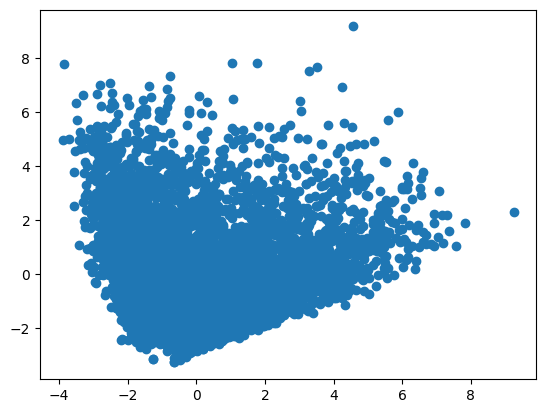

In [17]:
plt.scatter(data_pca.transpose()[0], data_pca.transpose()[1])

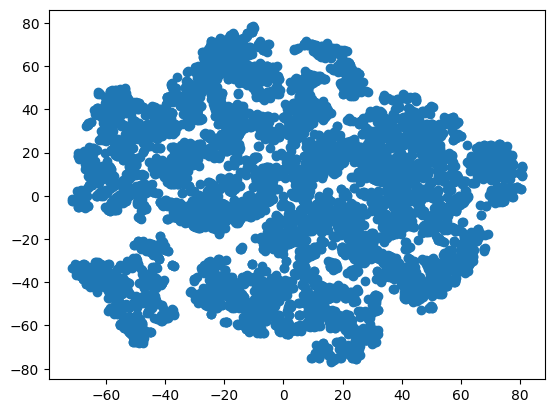

In [18]:
plt.scatter(data_tsne.transpose()[0], data_tsne.transpose()[1])

Как можно увидеть по графику t-SNE, в данных можно выделить несколько кластеров

## Кластеризация

### Выбор оптимального числа кластеров

KMeans - алгоритм с фиксированным числом кластеров. Для того, чтобы выбрать оптимальное число кластеров, необходимо оценить качество кластеризации для различных значений числа кластеров. Для оценки качества кластеризации подходят метрики, не использующие <i>ground-truth</i> метки классов, такие как <b>Silhouette score</b>.

$Silhouette_{avg} = (a - b)/max(a.b)$

где $a$ - среднее по всем объектам выборки внутрикластерное расстояние, $b$ - среднее по всем объектам выборки расстояние до ближайшего кластера. <b>Silhouette</b> принимает значения от -1 до 1, чем больше значение, тем лучше кластеризация

Подберём наиболее оптимальное число кластеров для алгоритма K-Meaans при помощи метрики Silhouette:

In [19]:
n_clusters_selection = {}

for n in tqdm_notebook(range(2, 16), total=14):
    cluster_labels = KMeans(
        n_clusters=n, n_init="auto",
        random_state=RANDOM_STATE
    ).fit_predict(df_clean)
    n_clusters_selection[n] = silhouette_score(df_clean, cluster_labels)

n_clusters_selection = pd.Series(n_clusters_selection, name="silhouette_score")

C:\Users\gastr\AppData\Local\Temp\ipykernel_3216\3210454944.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(2, 16), total=14):


  0%|          | 0/14 [00:00<?, ?it/s]

In [20]:
n_clusters_selection.describe()

count    14.000000
mean      0.194228
std       0.018837
min       0.171079
25%       0.184686
50%       0.191265
75%       0.196490
max       0.237984
Name: silhouette_score, dtype: float64

<Axes: xlabel='N Clusters', ylabel='Silhouette'>

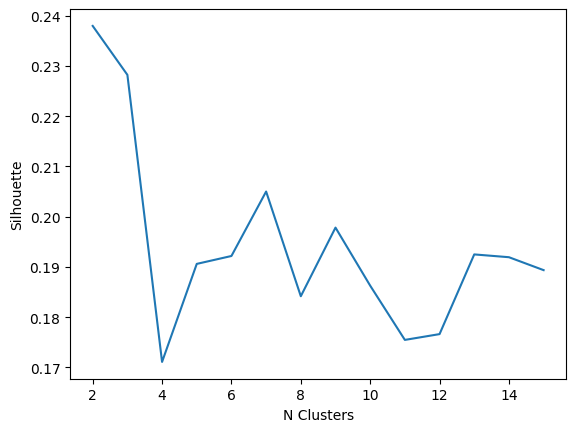

In [21]:
n_clusters_selection.plot(
    xlabel="N Clusters",
    ylabel="Silhouette",
)

In [22]:
n_clusters_selection

2     0.237984
3     0.228241
4     0.171079
5     0.190599
6     0.192172
7     0.205008
8     0.184159
9     0.197825
10    0.186267
11    0.175464
12    0.176618
13    0.192486
14    0.191930
15    0.189356
Name: silhouette_score, dtype: float64

In [23]:
BEST_N_CLUSTERS = n_clusters_selection.idxmax()
BEST_N_CLUSTERS

2

Вывод: Наиболее высокое качество кластеризации наблюдается при числе кластеров 2. Визуализируем получившиеся кластеры:

c:\Users\gastr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gastr\AppData\Local\Temp\ipykernel_3216\3196993346.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


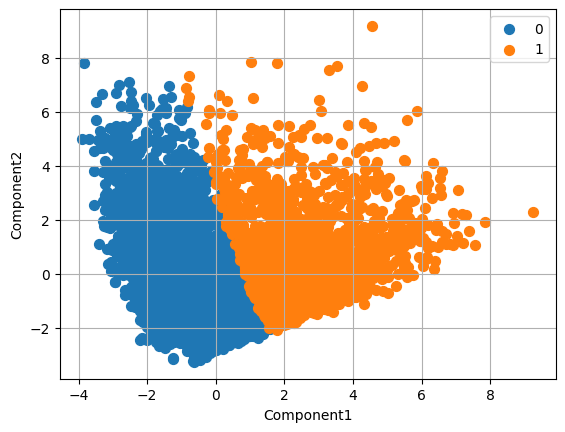

In [24]:
best_cluster_labels = KMeans(
    n_clusters=BEST_N_CLUSTERS, random_state=RANDOM_STATE
).fit_predict(df_clean)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Component1")
ax.set_ylabel("Component2")

pca = PCA(n_components=2, random_state=RANDOM_STATE)
data_points = pd.DataFrame(
    pca.fit_transform(df_clean),
    columns=["Component1", "Component2"]
)
data_points["Cluster"] = best_cluster_labels
clusters = data_points["Cluster"].unique()

for cluster in clusters:
    color = plt.get_cmap("tab10")(cluster)
    ax.scatter(
        data_points.loc[data_points["Cluster"] == cluster]["Component1"],
        data_points.loc[data_points["Cluster"] == cluster]["Component2"],
        c=color, s=50
    )

ax.legend(clusters)
ax.grid()
plt.show()

Посмотрим, сколько объектов попало в каждый кластер:

In [25]:
data_points["Cluster"].value_counts()

0    5440
1    1750
Name: Cluster, dtype: int64

### Выбор начальных центров

По умолчанию в sklearn алгоритм KMeans запускается несколько раз с различными случайными центрами кластеров. Попробуем выбирать центры кластеров случайным образом, перебрав все пары объектов из выборки, запуская алгоритм только 1 раз. Возьмём 50 случайных пар из всего множества точек в выборке:

In [26]:
center_selection = []

seed(RANDOM_STATE)
center_pairs = choices(list(combinations(df_clean.index, 2)), k=50)

for center_a, center_b in tqdm_notebook(center_pairs, total=len(center_pairs)):
    kmeans = KMeans(
        n_clusters=2,
        init = df_clean.loc[[center_a, center_b]],
        n_init=1, random_state=RANDOM_STATE
    ).fit(df_clean)
    cluster_labels = pd.Series(kmeans.predict(df_clean))
    silhouette = silhouette_score(df_clean, cluster_labels)
    center_selection.append(
        {
            "Center A": center_a,
            "Center B": center_b,
            "Silhouette": silhouette_score(df_clean, cluster_labels),
            # соотношение размеров кластеров:
            "Cluster_ratio": cluster_labels.value_counts().max() / cluster_labels.value_counts().min()
        }
    )

center_selection = pd.DataFrame(center_selection)

C:\Users\gastr\AppData\Local\Temp\ipykernel_3216\3506209016.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for center_a, center_b in tqdm_notebook(center_pairs, total=len(center_pairs)):


  0%|          | 0/50 [00:00<?, ?it/s]

In [27]:
center_selection[["Silhouette", "Cluster_ratio"]].describe()

,Silhouette,Cluster_ratio
count,50.000000,50.000000
mean,0.231170,3.298799
std,0.009713,1.426634
min,0.211010,3.055274
25%,0.221024,3.059853
50%,0.236092,3.114450
75%,0.237965,3.117984
max,0.238057,13.181460


<Axes: title={'center': 'Sihouette: Гистограмма'}, ylabel='Frequency'>

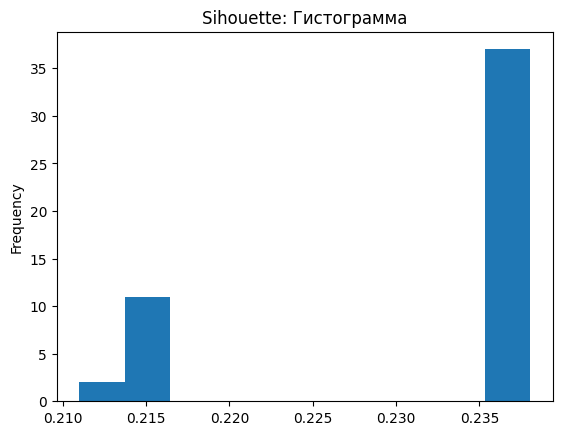

In [28]:
center_selection["Silhouette"].plot.hist(title="Sihouette: Гистограмма")

<Axes: title={'center': 'Соотношение размеров двух кластеров: Гистограмма'}, ylabel='Frequency'>

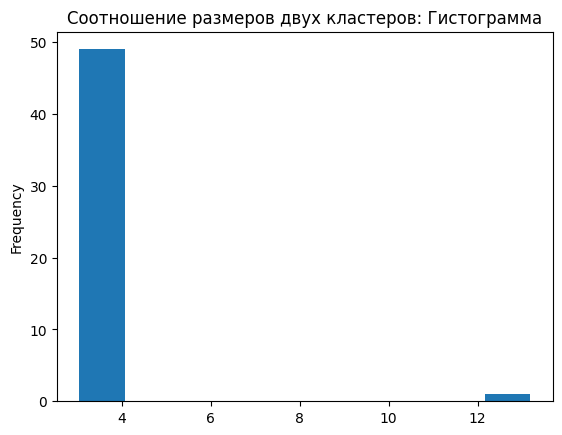

In [29]:
center_selection["Cluster_ratio"].plot.hist(title="Соотношение размеров двух кластеров: Гистограмма")

Как мы можем видеть по таблице и графикам выше, значения Silhouette и соотношения размеров кластеров стремятся к максимуму и минимуму соответственно, однако небольшая вариация всё-таки наблюдается

Попробуем визуализировать некоторые из получивщихся кластеризаций:

Center A: C11111, Center B: C13886, Silhouette: 0.23609161987627197
Center A: C11111, Center B: C13886, Silhouette: 0.23609161987627197


C:\Users\gastr\AppData\Local\Temp\ipykernel_3216\3345440229.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


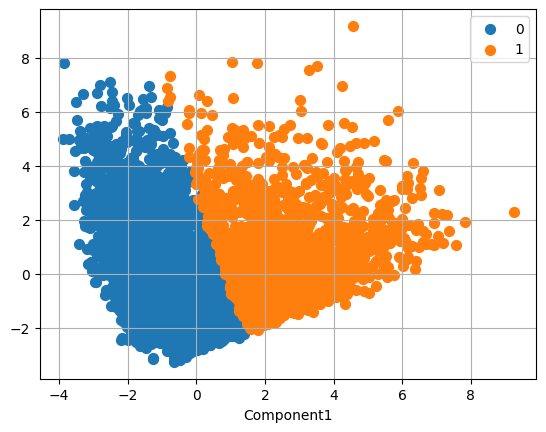

Center A: C13310, Center B: C16265, Silhouette: 0.23626591642780762
Center A: C13310, Center B: C16265, Silhouette: 0.23626591642780762


C:\Users\gastr\AppData\Local\Temp\ipykernel_3216\3345440229.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


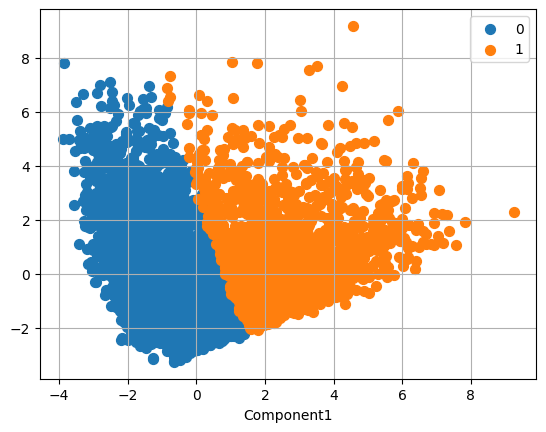

Center A: C15198, Center B: C15509, Silhouette: 0.23609161987627197
Center A: C15198, Center B: C15509, Silhouette: 0.23609161987627197


C:\Users\gastr\AppData\Local\Temp\ipykernel_3216\3345440229.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


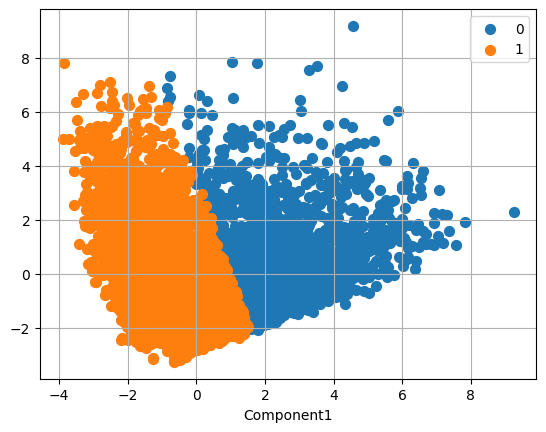

Center A: C11290, Center B: C12736, Silhouette: 0.23609161987627197
Center A: C11290, Center B: C12736, Silhouette: 0.23609161987627197


C:\Users\gastr\AppData\Local\Temp\ipykernel_3216\3345440229.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


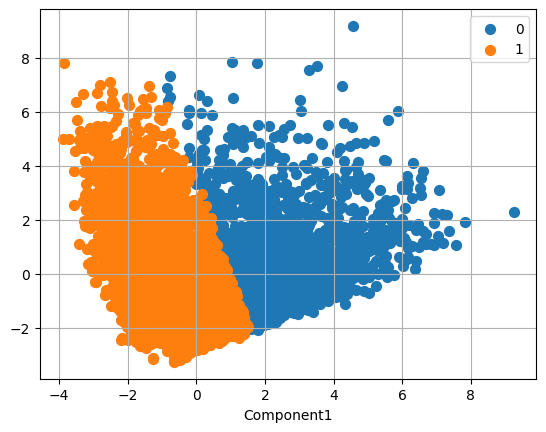

Center A: C13388, Center B: C18249, Silhouette: 0.23798445768209758
Center A: C13388, Center B: C18249, Silhouette: 0.23798445768209758


C:\Users\gastr\AppData\Local\Temp\ipykernel_3216\3345440229.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


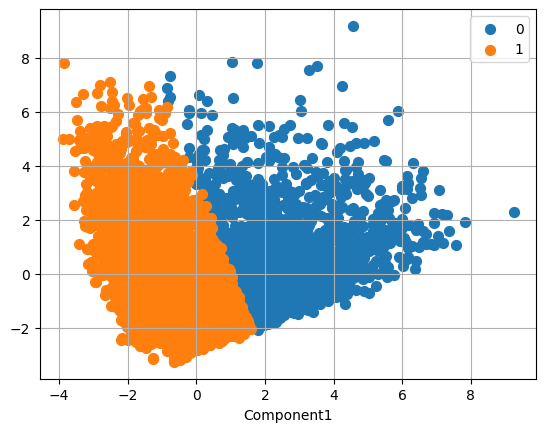

In [30]:
center_selection_sample = center_selection.sample(n=5, random_state=RANDOM_STATE)

pca = PCA(n_components=2, random_state=RANDOM_STATE)
data_points = pd.DataFrame(
    pca.fit_transform(df_clean),
    columns=["Component1", "Component2"]
)
clusters = [0, 1]

for center_a, center_b, silh in zip(
    center_selection_sample["Center A"],
    center_selection_sample["Center B"],
    center_selection_sample["Silhouette"]
):
    kmeans = KMeans(
        n_clusters=2,
        init = df_clean.loc[[center_a, center_b]],
        n_init=1, random_state=RANDOM_STATE
    ).fit(df_clean)
    cluster_labels = pd.Series(kmeans.predict(df_clean))
    data_points["Cluster"] = cluster_labels

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Component1")

    for cluster in clusters:
        print(f"Center A: {center_a}, Center B: {center_b}, Silhouette: {silh}")
        color = plt.get_cmap("tab10")(cluster)
        ax.scatter(
            data_points.loc[data_points["Cluster"] == cluster]["Component1"],
            data_points.loc[data_points["Cluster"] == cluster]["Component2"],
            c=color, s=50
        )

    ax.legend(clusters)
    ax.grid()
    plt.show()

Вывод: Выбор начальных центров может влиять на состав получившихся кластеров, также иногда возможно влияние на их форму, размер и качество кластеризации